In [21]:
from typing import Tuple

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import numpy as np

from numba import njit

plt.rcParams["figure.figsize"] = [12, 8]

In [18]:
@njit
def get_beta_vector(T: int,
                    α: float,
                    β: float) -> np.ndarray:
    discount = np.zeros((T,), dtype=np.float32)

    current_discount = 1
    for t in range(T):
        discount[t] = current_discount
        current_discount *= (α + t) / (α + β + t)

    return discount

In [14]:
def convert_params(mu: float, eta: float) -> Tuple[float, float]:
    """
    Convert the mu-eta parametrization to alpha-beta
    """
    alpha = mu / (eta * (1 - mu))
    beta = 1./eta

    return alpha, beta

In [30]:
convert_params(0.95, 1)

(18.999999999999982, 1.0)

Text(0, 0.5, 'Effective discount factor')

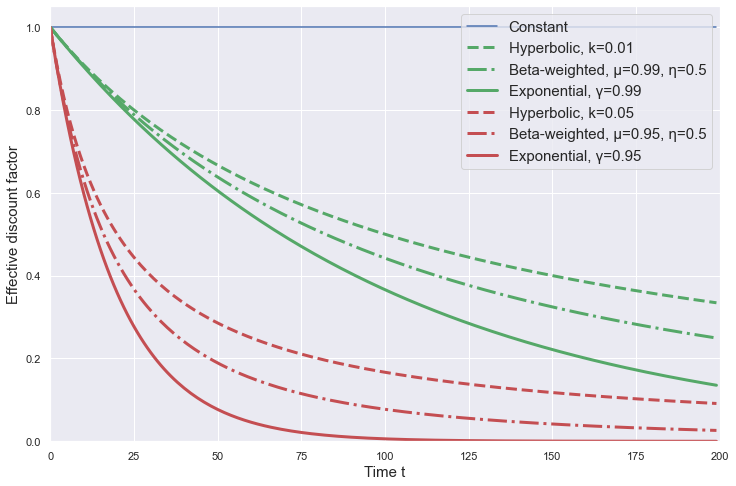

In [51]:
N = 200
X = np.arange(0, N)

plt.plot(X, np.ones_like(X), label="Constant")

plt.plot(X, 1/(1 + 0.01 * X), '--', lw=3, label="Hyperbolic, k=0.01", c='g')
plt.plot(X, get_beta_vector(200, *convert_params(0.99, 0.5)), '-.', lw=3, label="Beta-weighted, μ=0.99, η=0.5", c='g')
plt.plot(X, 0.99**X, '-', lw=3, label="Exponential, γ=0.99", c='g')


plt.plot(X, 1/(1 + 0.05 * X), '--', lw=3, label="Hyperbolic, k=0.05", c='r')
plt.plot(X, get_beta_vector(200, *convert_params(0.95, 0.5)), '-.', lw=3, label="Beta-weighted, μ=0.95, η=0.5", c='r')
plt.plot(X, 0.95**X, '-', lw=3, label="Exponential, γ=0.95", c='r')


plt.xlim(0, N)
plt.ylim(0, 1.05)

plt.legend(fontsize=15, loc='upper right')

plt.xlabel("Time t", fontsize=15)
plt.ylabel("Effective discount factor", fontsize=15)

In [ ]:
α

In [23]:
get_beta_vector(10, *convert_params(0.95, 1.0))

array([1.        , 0.95      , 0.9047619 , 0.8636364 , 0.82608694,
       0.7916667 , 0.76      , 0.7307692 , 0.7037037 , 0.6785714 ],
      dtype=float32)

In [31]:
get_beta_vector(10, 20, 1)

array([1.        , 0.95238096, 0.90909094, 0.8695652 , 0.8333333 ,
       0.8       , 0.7692308 , 0.7407407 , 0.71428573, 0.6896552 ],
      dtype=float32)

In [32]:
1 / (1 + 0.05 * np.arange(10))

array([1.        , 0.95238095, 0.90909091, 0.86956522, 0.83333333,
       0.8       , 0.76923077, 0.74074074, 0.71428571, 0.68965517])